**Import libraries**

In [1]:
import numpy
import tensorflow 
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers 
from tensorflow.keras.layers import Dense, Flatten 
from tensorflow.keras.layers import Conv2D 
from keras.optimizers import Adam 
from keras. utils import np_utils
import matplotlib.pyplot as plt  

**Load the data**

In [2]:
(x_train, y_train), (x_test, y_test)=mnist.load_data ()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print (x_train.shape)  
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


**Understanding the data**

In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

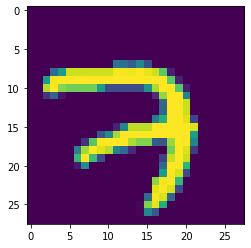

In [6]:
plt.imshow(x_train[5000]) 

**Reshaping**

In [7]:
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')

**One Hot Encoding**

In [8]:
number_of_classes = 10

In [9]:
y_train = np_utils.to_categorical (y_train, number_of_classes)
y_test = np_utils.to_categorical (y_test, number_of_classes)

In [10]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

##Add CNN Layers##

**Create model**

In [11]:
model=Sequential ()

**Add model layer**

In [12]:
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [13]:
model.add(Flatten())

In [14]:
model.add(Dense(number_of_classes,activation = 'softmax'))

##Compiling the model##

In [15]:
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

##Train the model##

In [16]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 219s 116ms/step - loss: 0.2168 - accuracy: 0.9531 - val_loss: 0.0973 - val_accuracy: 0.9705
Epoch 2/5
1875/1875 [==============================] - 194s 104ms/step - loss: 0.0645 - accuracy: 0.9802 - val_loss: 0.0821 - val_accuracy: 0.9768
Epoch 3/5
1875/1875 [==============================] - 195s 104ms/step - loss: 0.0432 - accuracy: 0.9872 - val_loss: 0.0796 - val_accuracy: 0.9804
Epoch 4/5
1875/1875 [==============================] - 196s 105ms/step - loss: 0.0374 - accuracy: 0.9880 - val_loss: 0.1041 - val_accuracy: 0.9744
Epoch 5/5
1875/1875 [==============================] - 195s 104ms/step - loss: 0.0257 - accuracy: 0.9918 - val_loss: 0.1420 - val_accuracy: 0.9741


**Evaluation of the model**

In [17]:
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.14196717739105225, 0.9740999937057495]


##Test the model##

In [18]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

1/1 [==============================] - 0s 102ms/step
[[1.6097920e-20 1.5996586e-23 9.8637554e-15 2.7773744e-08 7.7174947e-05
  1.5905622e-11 1.9054559e-22 9.2602104e-10 5.5353142e-11 9.9992275e-01]]


In [19]:
import numpy as np
print(np.argmax(prediction, axis=1)) 
np.argmax(y_test[5000:5001]) 

[9]


3

##Save the model##

In [20]:
model.save('sprint2/project.h5')